<a href="https://colab.research.google.com/github/sheikh495/Intermediate-SQL/blob/main/Intermediate_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Creating the Database Tables
Install SQLite (optional, it's usually pre-installed) Google Colab already includes SQLite by default, but you can double-check by running the following command:

In [ ]:
!apt-get install sqlite3


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
sqlite3 is already the newest version (3.37.2-2ubuntu0.3).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


2. Creating the Database and Tables in Python using SQLite

In [ ]:
import sqlite3
from tabulate import tabulate

# Connect to SQLite database (it will create a new file if it doesn't exist)
conn = sqlite3.connect('customer_orders.db')
cursor = conn.cursor()

# Create Customers table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers (
    CustomerID INTEGER PRIMARY KEY,
    CustomerName TEXT NOT NULL,
    Country TEXT NOT NULL
)
''')

# Create Orders table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Orders (
    OrderID INTEGER PRIMARY KEY,
    CustomerID INTEGER,
    OrderDate TEXT NOT NULL,
    TotalAmount REAL,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
)
''')

conn.commit()


# Step 2: Inserting Data into the Tables

The error you're encountering, `IntegrityError: UNIQUE constraint failed: Customers.CustomerID`, occurs because you're trying to insert a value for `CustomerID` that already exists in the `Customers` table. This means that the table already contains records with the same `CustomerID`.

To fix this, you have a few options:

### Option 1: Clear the Table Before Inserting
You can delete existing data from the table before reinserting the values to avoid duplicate `CustomerID` errors.

Add this before your insert statement:

```python
# Clear the Customers table before inserting
cursor.execute('DELETE FROM Customers')

# Clear the Orders table before inserting
cursor.execute('DELETE FROM Orders')

# Insert data into Customers table
cursor.executemany('''
INSERT INTO Customers (CustomerID, CustomerName, Country) VALUES (?, ?, ?)
''', [
    (1, 'Alice', 'USA'),
    (2, 'Bob', 'UK'),
    (3, 'Charlie', 'USA'),
    (4, 'Diana', 'Canada'),
    (5, 'Eve', 'Australia')
])

# Insert data into Orders table
cursor.executemany('''
INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES (?, ?, ?, ?)
''', [
    (101, 1, '2024-01-15', 120.50),
    (102, 1, '2024-02-10', 80.00),
    (103, 2, '2024-01-20', 200.00),
    (104, 3, '2024-03-12', 150.00),
    (105, 4, '2024-02-05', 60.00),
    (106, 5, '2024-03-30', 90.00)
])

conn.commit()
```

This will ensure that all previous data is removed, and your new inserts will work without conflicting with the existing records.

### Option 2: Use `INSERT OR IGNORE`
If you want to insert data but ignore entries that would violate the unique constraint, you can use `INSERT OR IGNORE`. This skips inserting any duplicate `CustomerID` rows without throwing an error.

For example:

```python
cursor.executemany('''
INSERT OR IGNORE INTO Customers (CustomerID, CustomerName, Country) VALUES (?, ?, ?)
''', [
    (1, 'Alice', 'USA'),
    (2, 'Bob', 'UK'),
    (3, 'Charlie', 'USA'),
    (4, 'Diana', 'Canada'),
    (5, 'Eve', 'Australia')
])

# Same for Orders
cursor.executemany('''
INSERT OR IGNORE INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES (?, ?, ?, ?)
''', [
    (101, 1, '2024-01-15', 120.50),
    (102, 1, '2024-02-10', 80.00),
    (103, 2, '2024-01-20', 200.00),
    (104, 3, '2024-03-12', 150.00),
    (105, 4, '2024-02-05', 60.00),
    (106, 5, '2024-03-30', 90.00)
])

conn.commit()
```

This option prevents the same `CustomerID` from being inserted multiple times.

### Option 3: Drop and Recreate the Table
If you are testing and want to start fresh each time, you can drop the tables before recreating them:

```python
# Drop tables if they exist
cursor.execute('DROP TABLE IF EXISTS Customers')
cursor.execute('DROP TABLE IF EXISTS Orders')

# Recreate the tables
cursor.execute('''
CREATE TABLE Customers (
    CustomerID INTEGER PRIMARY KEY,
    CustomerName TEXT NOT NULL,
    Country TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE Orders (
    OrderID INTEGER PRIMARY KEY,
    CustomerID INTEGER,
    OrderDate TEXT NOT NULL,
    TotalAmount REAL,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
)
''')

# Insert data again
cursor.executemany('''
INSERT INTO Customers (CustomerID, CustomerName, Country) VALUES (?, ?, ?)
''', [
    (1, 'Alice', 'USA'),
    (2, 'Bob', 'UK'),
    (3, 'Charlie', 'USA'),
    (4, 'Diana', 'Canada'),
    (5, 'Eve', 'Australia')
])

cursor.executemany('''
INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES (?, ?, ?, ?)
''', [
    (101, 1, '2024-01-15', 120.50),
    (102, 1, '2024-02-10', 80.00),
    (103, 2, '2024-01-20', 200.00),
    (104, 3, '2024-03-12', 150.00),
    (105, 4, '2024-02-05', 60.00),
    (106, 5, '2024-03-30', 90.00)
])

conn.commit()
```

This ensures you're always working with a fresh table and will avoid any conflicts.

# Insert data into Customers table
cursor.executemany('''
INSERT INTO Customers (CustomerID, CustomerName, Country) VALUES (?, ?, ?)
''', [
    (1, 'Alice', 'USA'),
    (2, 'Bob', 'UK'),
    (3, 'Charlie', 'USA'),
    (4, 'Diana', 'Canada'),
    (5, 'Eve', 'Australia')
])

# Insert data into Orders table
cursor.executemany('''
INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES (?, ?, ?, ?)
''', [
    (101, 1, '2024-01-15', 120.50),
    (102, 1, '2024-02-10', 80.00),
    (103, 2, '2024-01-20', 200.00),
    (104, 3, '2024-03-12', 150.00),
    (105, 4, '2024-02-05', 60.00),
    (106, 5, '2024-03-30', 90.00)
])

conn.commit()


In [ ]:
# Clear the Customers table before inserting
cursor.execute('DELETE FROM Customers')

# Clear the Orders table before inserting
cursor.execute('DELETE FROM Orders')

# Insert data into Customers table
cursor.executemany('''
INSERT INTO Customers (CustomerID, CustomerName, Country) VALUES (?, ?, ?)
''', [
    (1, 'Alice', 'USA'),
    (2, 'Bob', 'UK'),
    (3, 'Charlie', 'USA'),
    (4, 'Diana', 'Canada'),
    (5, 'Eve', 'Australia')
])

# Insert data into Orders table
cursor.executemany('''
INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES (?, ?, ?, ?)
''', [
    (101, 1, '2024-01-15', 120.50),
    (102, 1, '2024-02-10', 80.00),
    (103, 2, '2024-01-20', 200.00),
    (104, 3, '2024-03-12', 150.00),
    (105, 4, '2024-02-05', 60.00),
    (106, 5, '2024-03-30', 90.00)
])

conn.commit()


#Step 3: Writing SQL Queries

Problem 1: Customer Orders with Conditional Logic

In [ ]:
cursor.execute('''
SELECT
    c.CustomerName,
    c.Country,
    o.TotalAmount,
    CASE
        WHEN o.TotalAmount > 150 THEN 'High'
        WHEN o.TotalAmount BETWEEN 100 AND 150 THEN 'Medium'
        ELSE 'Low'
    END AS OrderCategory
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
''')

results = cursor.fetchall()
print(tabulate(results, headers=["CustomerName", "Country", "TotalAmount", "OrderCategory"]))


CustomerName    Country      TotalAmount  OrderCategory
--------------  ---------  -------------  ---------------
Alice           USA                120.5  Medium
Alice           USA                 80    Low
Bob             UK                 200    High
Charlie         USA                150    Medium
Diana           Canada              60    Low
Eve             Australia           90    Low


Problem 2: Grouping and Aggregation by Country

In [ ]:
cursor.execute('''
SELECT
    c.Country,
    COUNT(o.OrderID) AS TotalOrders
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
GROUP BY c.Country
HAVING COUNT(o.OrderID) > 1
''')

results = cursor.fetchall()
print(tabulate(results, headers=["Country", "TotalOrders"]))


Country      TotalOrders
---------  -------------
USA                    3


Problem 3: Combining Tables with Joins (Outer Join)
SQLite doesn't directly support OUTER JOIN, so you can use a LEFT JOIN to include customers who haven’t placed an order.

In [ ]:
cursor.execute('''
SELECT
    c.CustomerName,
    o.OrderID,
    o.TotalAmount
FROM Customers c
LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
''')

results = cursor.fetchall()
print(tabulate(results, headers=["CustomerName", "OrderID", "TotalAmount"]))


CustomerName      OrderID    TotalAmount
--------------  ---------  -------------
Alice                 102           80
Alice                 101          120.5
Bob                   103          200
Charlie               104          150
Diana                 105           60
Eve                   106           90


Problem 4: Subqueries

In [ ]:
cursor.execute('''
SELECT
    c.CustomerName,
    o.TotalAmount
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
WHERE o.TotalAmount > (SELECT AVG(TotalAmount) FROM Orders)
''')

results = cursor.fetchall()
print(tabulate(results, headers=["CustomerName", "TotalAmount"]))


CustomerName      TotalAmount
--------------  -------------
Alice                   120.5
Bob                     200
Charlie                 150


Problem 5: Using a CTE for Average Order Amount

In [ ]:
cursor.execute('''
WITH CountryAverage AS (
    SELECT
        c.Country,
        AVG(o.TotalAmount) AS AvgAmount
    FROM Orders o
    JOIN Customers c ON o.CustomerID = c.CustomerID
    GROUP BY c.Country
)
SELECT
    c.CustomerName,
    o.TotalAmount
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
JOIN CountryAverage ca ON c.Country = ca.Country
WHERE o.TotalAmount > ca.AvgAmount
''')

results = cursor.fetchall()
print(tabulate(results, headers=["CustomerName", "TotalAmount"]))


CustomerName      TotalAmount
--------------  -------------
Alice                   120.5
Charlie                 150


# Step 4: Closing the Database Connection
Don't forget to close the database connection when you're done.

In [ ]:
conn.close()


# Full Python Code for Google Colab

In [ ]:
import sqlite3
from tabulate import tabulate

# Connect to SQLite database
conn = sqlite3.connect('customer_orders.db')
cursor = conn.cursor()

# Create Customers and Orders table
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers (
    CustomerID INTEGER PRIMARY KEY,
    CustomerName TEXT NOT NULL,
    Country TEXT NOT NULL
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Orders (
    OrderID INTEGER PRIMARY KEY,
    CustomerID INTEGER,
    OrderDate TEXT NOT NULL,
    TotalAmount REAL,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
)
''')

# Insert data into Customers table
cursor.executemany('''
INSERT INTO Customers (CustomerID, CustomerName, Country) VALUES (?, ?, ?)
''', [
    (1, 'Alice', 'USA'),
    (2, 'Bob', 'UK'),
    (3, 'Charlie', 'USA'),
    (4, 'Diana', 'Canada'),
    (5, 'Eve', 'Australia')
])

# Insert data into Orders table
cursor.executemany('''
INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES (?, ?, ?, ?)
''', [
    (101, 1, '2024-01-15', 120.50),
    (102, 1, '2024-02-10', 80.00),
    (103, 2, '2024-01-20', 200.00),
    (104, 3, '2024-03-12', 150.00),
    (105, 4, '2024-02-05', 60.00),
    (106, 5, '2024-03-30', 90.00)
])

conn.commit()

# Queries
# Problem 1
cursor.execute('''
SELECT
    c.CustomerName,
    c.Country,
    o.TotalAmount,
    CASE
        WHEN o.TotalAmount > 150 THEN 'High'
        WHEN o.TotalAmount BETWEEN 100 AND 150 THEN 'Medium'
        ELSE 'Low'
    END AS OrderCategory
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
''')

results = cursor.fetchall()
print(tabulate(results, headers=["CustomerName", "Country", "TotalAmount", "OrderCategory"]))

# Problem 2
cursor.execute('''
SELECT
    c.Country,
    COUNT(o.OrderID) AS TotalOrders
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
GROUP BY c.Country
HAVING COUNT(o.OrderID) > 1
''')

results = cursor.fetchall()
print(tabulate(results, headers=["Country", "TotalOrders"]))

# Problem 3
cursor.execute('''
SELECT
    c.CustomerName,
    o.OrderID,
    o.TotalAmount
FROM Customers c
LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
''')

results = cursor.fetchall()
print(tabulate(results, headers=["CustomerName", "OrderID", "TotalAmount"]))

# Problem 4
cursor.execute('''
SELECT
    c.CustomerName,
    o.TotalAmount
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
WHERE o.TotalAmount > (SELECT AVG(TotalAmount) FROM Orders)
''')

results = cursor.fetchall()
print(tabulate(results, headers=["CustomerName", "TotalAmount"]))

# Problem 5
cursor.execute('''
WITH CountryAverage AS (
    SELECT
        c.Country,
        AVG(o.TotalAmount) AS AvgAmount
    FROM Orders o
    JOIN Customers c ON o.CustomerID = c.CustomerID
    GROUP BY c.Country
)
SELECT
    c.CustomerName,
    o.TotalAmount
FROM Orders o
JOIN Customers c ON o.CustomerID = c.CustomerID
JOIN CountryAverage ca ON c.Country = ca.Country
WHERE o.TotalAmount > ca.AvgAmount
''')

results = cursor.fetchall()
print(tabulate(results, headers=["CustomerName", "TotalAmount"]))

# Close connection
conn.close()


CustomerName    Country      TotalAmount  OrderCategory
--------------  ---------  -------------  ---------------
Alice           USA                120.5  Medium
Alice           USA                 80    Low
Bob             UK                 200    High
Charlie         USA                150    Medium
Diana           Canada              60    Low
Eve             Australia           90    Low
Country      TotalOrders
---------  -------------
USA                    3
CustomerName      OrderID    TotalAmount
--------------  ---------  -------------
Alice                 102           80
Alice                 101          120.5
Bob                   103          200
Charlie               104          150
Diana                 105           60
Eve                   106           90
CustomerName      TotalAmount
--------------  -------------
Alice                   120.5
Bob                     200
Charlie                 150
CustomerName      TotalAmount
--------------  -------------
Alic

# Test

In [1]:
import sqlite3

# Step 1: Connect to SQLite database (it will be created if it doesn't exist)
conn = sqlite3.connect('customer_orders.db')
cursor = conn.cursor()

# Step 2: Creating the Database Tables
cursor.execute('''
CREATE TABLE Customers (
    CustomerID INTEGER PRIMARY KEY,       -- Unique identifier for each customer
    CustomerName TEXT,                    -- Customer's name
    Country TEXT                          -- Country where the customer resides
)
''')

cursor.execute('''
CREATE TABLE Orders (
    OrderID INTEGER PRIMARY KEY,          -- Unique identifier for each order
    CustomerID INTEGER,                   -- Foreign key from Customers table
    OrderDate DATE,                       -- Date of the order
    TotalAmount REAL,                     -- Total amount for the order
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID) -- Enforce foreign key relationship
)
''')

# Step 3: Insert Data into the Tables
cursor.executemany('''
INSERT INTO Customers (CustomerID, CustomerName, Country) VALUES (?, ?, ?)
''', [
    (1, 'Alice', 'USA'),
    (2, 'Bob', 'UK'),
    (3, 'Charlie', 'USA'),
    (4, 'Diana', 'Canada'),
    (5, 'Eve', 'Australia'),
    (6, 'Jasper', 'Spain')  # Added new customer
])

cursor.executemany('''
INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES (?, ?, ?, ?)
''', [
    (101, 1, '2024-01-15', 120.50),
    (102, 1, '2024-02-10', 80.00),
    (103, 2, '2024-01-20', 200.00),
    (104, 3, '2024-03-12', 150.00),
    (105, 4, '2024-02-05', 60.00),
    (106, 5, '2024-03-30', 90.00)
])

# Step 4: Commit the changes
conn.commit()

# Function to execute a query and fetch results
def execute_query(query):
    cursor.execute(query)
    return cursor.fetchall()

# Problem 1: Customer Orders with Conditional Logic
query1 = '''
SELECT
    c.CustomerName,
    c.Country,
    ROUND(o.TotalAmount, 0) AS TotalAmount,
    CASE
        WHEN ROUND(o.TotalAmount, 0) > 150 THEN 'High'
        WHEN ROUND(o.TotalAmount, 0) BETWEEN 100 AND 150 THEN 'Medium'
        ELSE 'Low'
    END AS OrderCategory
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
'''
results1 = execute_query(query1)

# Problem 2: Grouping and Aggregation by Country
query2 = '''
SELECT
    c.Country,
    COUNT(o.OrderID) AS TotalOrders
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
GROUP BY c.Country
HAVING COUNT(o.OrderID) > 1
'''
results2 = execute_query(query2)

# Problem 3: Combining Tables with Joins
query3 = '''
SELECT
    c.CustomerName,
    o.OrderID,
    ROUND(o.TotalAmount, 0) AS TotalAmount
FROM Customers c
LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
'''
results3 = execute_query(query3)

# Problem 4: Subqueries
query4 = '''
SELECT
    c.CustomerName,
    CEIL(o.TotalAmount) AS RoundedTotalAmount
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
WHERE CEIL(o.TotalAmount) > (
    SELECT AVG(TotalAmount) FROM Orders
)
'''
results4 = execute_query(query4)

# Problem 5: Using CTE for Average Order Amount
query5 = '''
WITH CustomerAverage AS (
    SELECT
        c.CustomerID,
        c.CustomerName,
        CEILING(AVG(o.TotalAmount)) AS AverageOrderAmount
    FROM Customers c
    LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
    GROUP BY c.CustomerID, c.CustomerName
),
CountryAverage AS (
    SELECT
        c.Country,
        CEILING(AVG(o.TotalAmount)) AS CountryAvgOrderAmount
    FROM Customers c
    JOIN Orders o ON c.CustomerID = o.CustomerID
    GROUP BY c.Country
)
SELECT
    ca.CustomerID,
    ca.CustomerName,
    ca.AverageOrderAmount,
    ca2.CountryAvgOrderAmount
FROM CustomerAverage ca
JOIN Customers c ON ca.CustomerID = c.CustomerID
JOIN CountryAverage ca2 ON c.Country = ca2.Country
WHERE ca.AverageOrderAmount > ca2.CountryAvgOrderAmount
'''
results5 = execute_query(query5)

# Print the results
print("Problem 1 Results:", results1)
print("Problem 2 Results:", results2)
print("Problem 3 Results:", results3)
print("Problem 4 Results:", results4)
print("Problem 5 Results:", results5)

# Close the connection
conn.close()


Problem 1 Results: [('Alice', 'USA', 121.0, 'Medium'), ('Alice', 'USA', 80.0, 'Low'), ('Bob', 'UK', 200.0, 'High'), ('Charlie', 'USA', 150.0, 'Medium'), ('Diana', 'Canada', 60.0, 'Low'), ('Eve', 'Australia', 90.0, 'Low')]
Problem 2 Results: [('USA', 3)]
Problem 3 Results: [('Alice', 102, 80.0), ('Alice', 101, 121.0), ('Bob', 103, 200.0), ('Charlie', 104, 150.0), ('Diana', 105, 60.0), ('Eve', 106, 90.0), ('Jasper', None, None)]
Problem 4 Results: [('Alice', 121.0), ('Bob', 200.0), ('Charlie', 150.0)]
Problem 5 Results: [(3, 'Charlie', 150.0, 117.0)]


# 2

<ipython-input-3-b55186f4b2ea>:150: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='OrderCategory', palette='viridis')


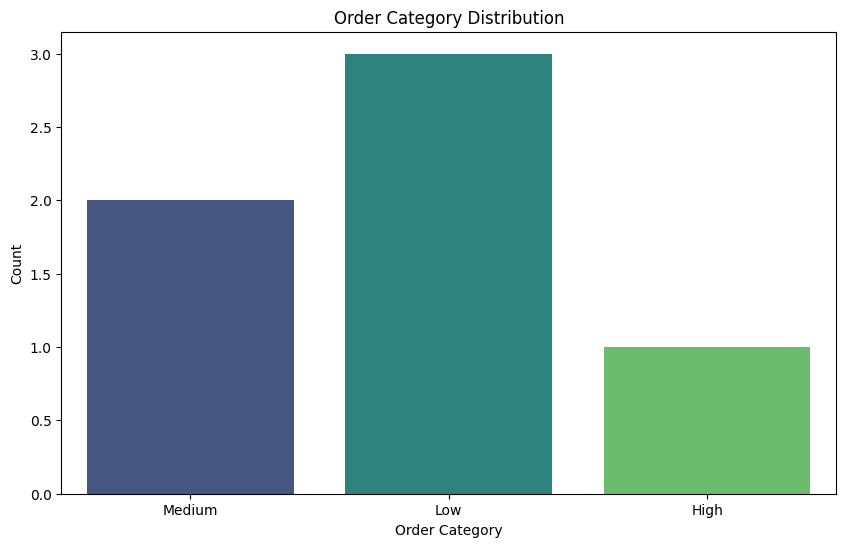

<ipython-input-3-b55186f4b2ea>:158: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x='Country', y='TotalOrders', palette='coolwarm')


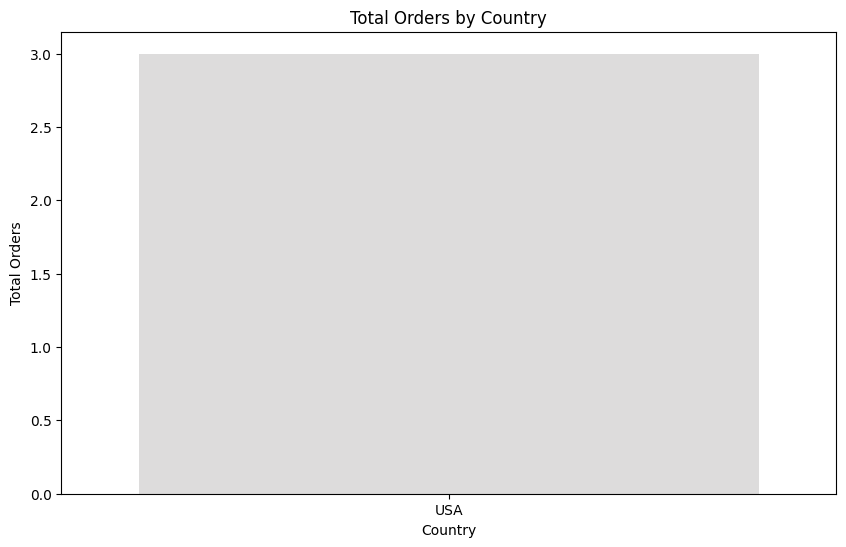

<ipython-input-3-b55186f4b2ea>:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df4, x='CustomerName', y='RoundedTotalAmount', palette='magma')


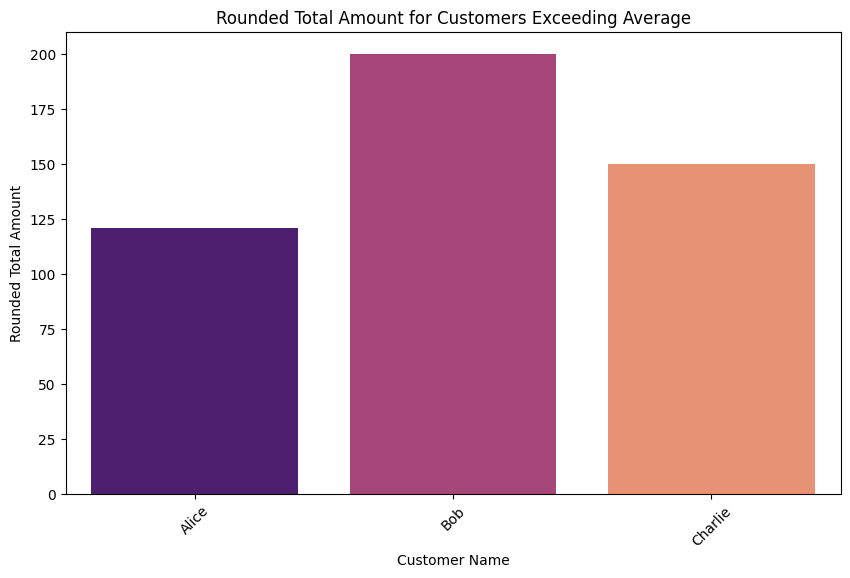

<ipython-input-3-b55186f4b2ea>:175: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df5, x='CustomerName', y='AverageOrderAmount', palette='crest', label='Customer Average')
<ipython-input-3-b55186f4b2ea>:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df5, x='CustomerName', y='CountryAvgOrderAmount', palette='pastel', alpha=0.5, label='Country Average')


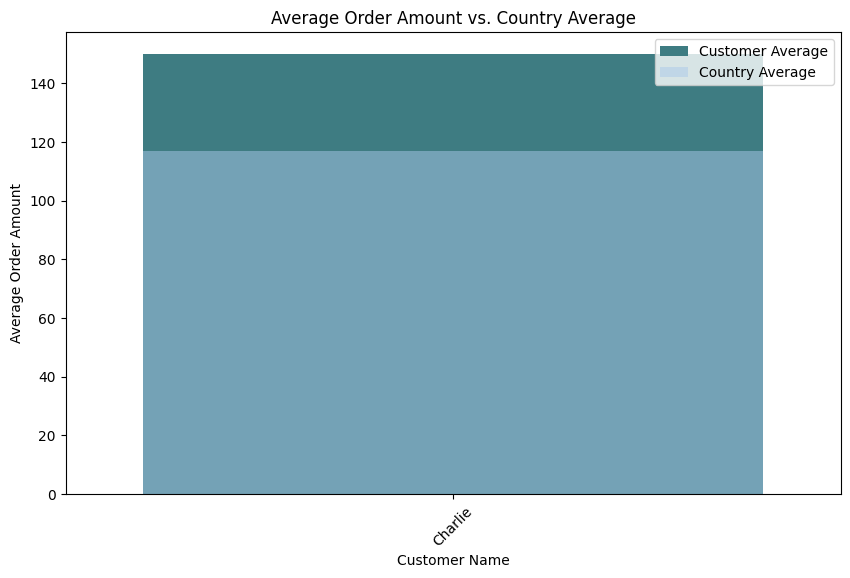

In [3]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to SQLite database
conn = sqlite3.connect('customer_orders.db')
cursor = conn.cursor()

# Step 2: Creating the Database Tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers (
    CustomerID INTEGER PRIMARY KEY,
    CustomerName TEXT,
    Country TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Orders (
    OrderID INTEGER PRIMARY KEY,
    CustomerID INTEGER,
    OrderDate DATE,
    TotalAmount REAL,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
)
''')

# Step 3: Insert Data into the Tables
cursor.executemany('''
INSERT INTO Customers (CustomerID, CustomerName, Country) VALUES (?, ?, ?)
''', [
    (1, 'Alice', 'USA'),
    (2, 'Bob', 'UK'),
    (3, 'Charlie', 'USA'),
    (4, 'Diana', 'Canada'),
    (5, 'Eve', 'Australia'),
    (6, 'Jasper', 'Spain')  # Added new customer
])

cursor.executemany('''
INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES (?, ?, ?, ?)
''', [
    (101, 1, '2024-01-15', 120.50),
    (102, 1, '2024-02-10', 80.00),
    (103, 2, '2024-01-20', 200.00),
    (104, 3, '2024-03-12', 150.00),
    (105, 4, '2024-02-05', 60.00),
    (106, 5, '2024-03-30', 90.00)
])

conn.commit()

# Function to execute a query and fetch results
def execute_query(query):
    cursor.execute(query)
    return cursor.fetchall()

# Problem 1: Customer Orders with Conditional Logic
query1 = '''
SELECT
    c.CustomerName,
    c.Country,
    ROUND(o.TotalAmount, 0) AS TotalAmount,
    CASE
        WHEN ROUND(o.TotalAmount, 0) > 150 THEN 'High'
        WHEN ROUND(o.TotalAmount, 0) BETWEEN 100 AND 150 THEN 'Medium'
        ELSE 'Low'
    END AS OrderCategory
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
'''
results1 = execute_query(query1)
df1 = pd.DataFrame(results1, columns=['CustomerName', 'Country', 'TotalAmount', 'OrderCategory'])

# Problem 2: Grouping and Aggregation by Country
query2 = '''
SELECT
    c.Country,
    COUNT(o.OrderID) AS TotalOrders
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
GROUP BY c.Country
HAVING COUNT(o.OrderID) > 1
'''
results2 = execute_query(query2)
df2 = pd.DataFrame(results2, columns=['Country', 'TotalOrders'])

# Problem 3: Combining Tables with Joins
query3 = '''
SELECT
    c.CustomerName,
    o.OrderID,
    ROUND(o.TotalAmount, 0) AS TotalAmount
FROM Customers c
LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
'''
results3 = execute_query(query3)
df3 = pd.DataFrame(results3, columns=['CustomerName', 'OrderID', 'TotalAmount'])

# Problem 4: Subqueries
query4 = '''
SELECT
    c.CustomerName,
    CEIL(o.TotalAmount) AS RoundedTotalAmount
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
WHERE CEIL(o.TotalAmount) > (
    SELECT AVG(TotalAmount) FROM Orders
)
'''
results4 = execute_query(query4)
df4 = pd.DataFrame(results4, columns=['CustomerName', 'RoundedTotalAmount'])

# Problem 5: Using CTE for Average Order Amount
query5 = '''
WITH CustomerAverage AS (
    SELECT
        c.CustomerID,
        c.CustomerName,
        CEILING(AVG(o.TotalAmount)) AS AverageOrderAmount
    FROM Customers c
    LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
    GROUP BY c.CustomerID, c.CustomerName
),
CountryAverage AS (
    SELECT
        c.Country,
        CEILING(AVG(o.TotalAmount)) AS CountryAvgOrderAmount
    FROM Customers c
    JOIN Orders o ON c.CustomerID = o.CustomerID
    GROUP BY c.Country
)
SELECT
    ca.CustomerID,
    ca.CustomerName,
    ca.AverageOrderAmount,
    ca2.CountryAvgOrderAmount
FROM CustomerAverage ca
JOIN Customers c ON ca.CustomerID = c.CustomerID
JOIN CountryAverage ca2 ON c.Country = ca2.Country
WHERE ca.AverageOrderAmount > ca2.CountryAvgOrderAmount
'''
results5 = execute_query(query5)
df5 = pd.DataFrame(results5, columns=['CustomerID', 'CustomerName', 'AverageOrderAmount', 'CountryAvgOrderAmount'])

# Visualizations
# Problem 1: Order Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='OrderCategory', palette='viridis')
plt.title('Order Category Distribution')
plt.xlabel('Order Category')
plt.ylabel('Count')
plt.show()

# Problem 2: Total Orders by Country
plt.figure(figsize=(10, 6))
sns.barplot(data=df2, x='Country', y='TotalOrders', palette='coolwarm')
plt.title('Total Orders by Country')
plt.xlabel('Country')
plt.ylabel('Total Orders')
plt.show()

# Problem 4: Rounded Total Amount for Customers Exceeding Average
plt.figure(figsize=(10, 6))
sns.barplot(data=df4, x='CustomerName', y='RoundedTotalAmount', palette='magma')
plt.title('Rounded Total Amount for Customers Exceeding Average')
plt.xlabel('Customer Name')
plt.ylabel('Rounded Total Amount')
plt.xticks(rotation=45)
plt.show()

# Problem 5: Average Order Amount vs. Country Average
plt.figure(figsize=(10, 6))
sns.barplot(data=df5, x='CustomerName', y='AverageOrderAmount', palette='crest', label='Customer Average')
sns.barplot(data=df5, x='CustomerName', y='CountryAvgOrderAmount', palette='pastel', alpha=0.5, label='Country Average')
plt.title('Average Order Amount vs. Country Average')
plt.xlabel('Customer Name')
plt.ylabel('Average Order Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Close the connection
conn.close()


#3

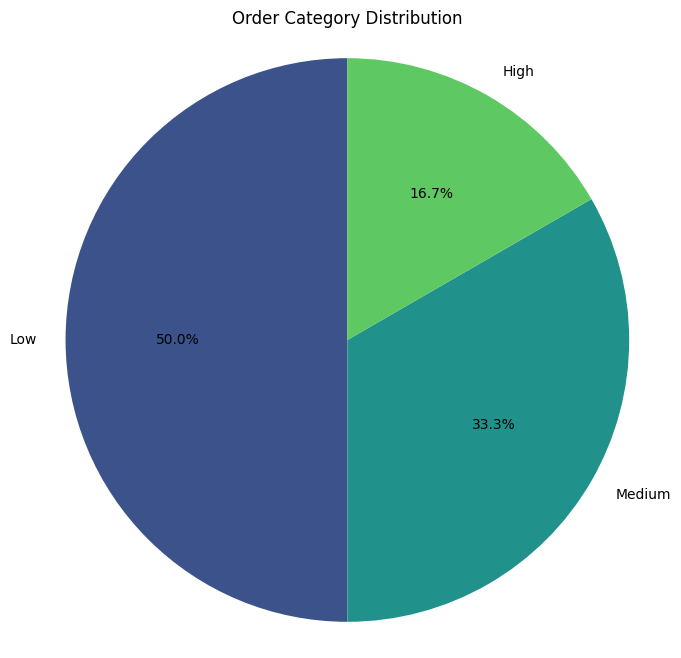

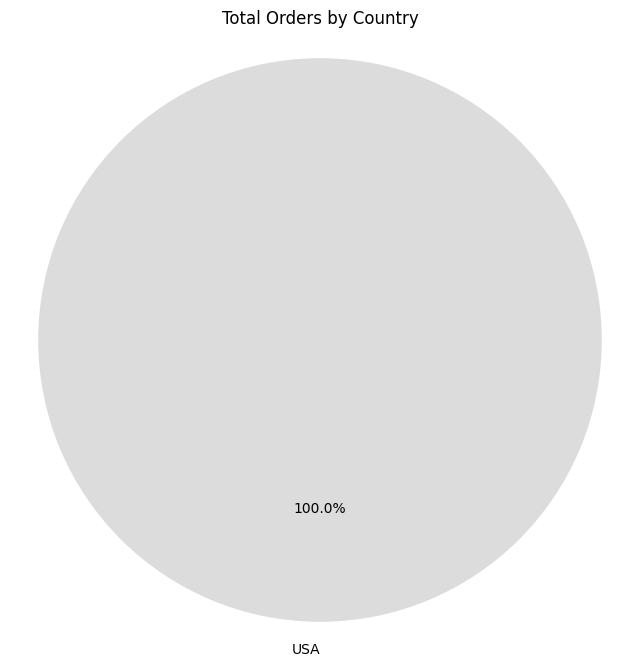

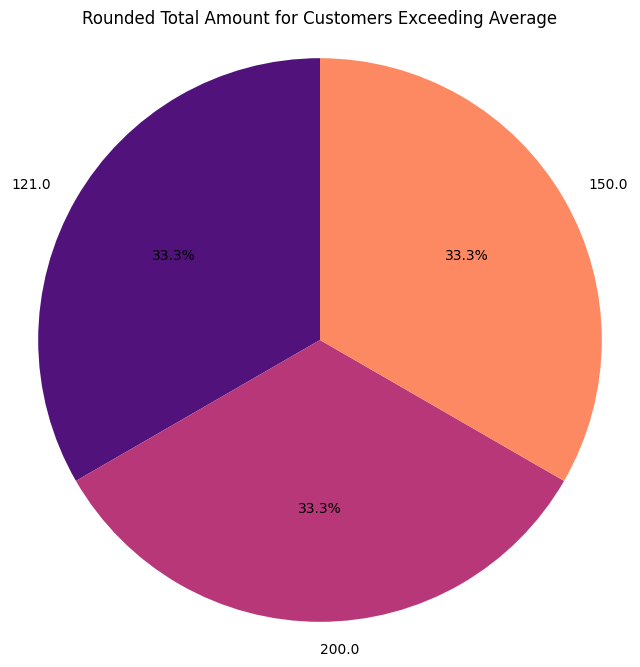

<ipython-input-4-0ce5b1141615>:174: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df5, x='CustomerName', y='AverageOrderAmount', palette='crest', label='Customer Average')
<ipython-input-4-0ce5b1141615>:175: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df5, x='CustomerName', y='CountryAvgOrderAmount', palette='pastel', alpha=0.5, label='Country Average')


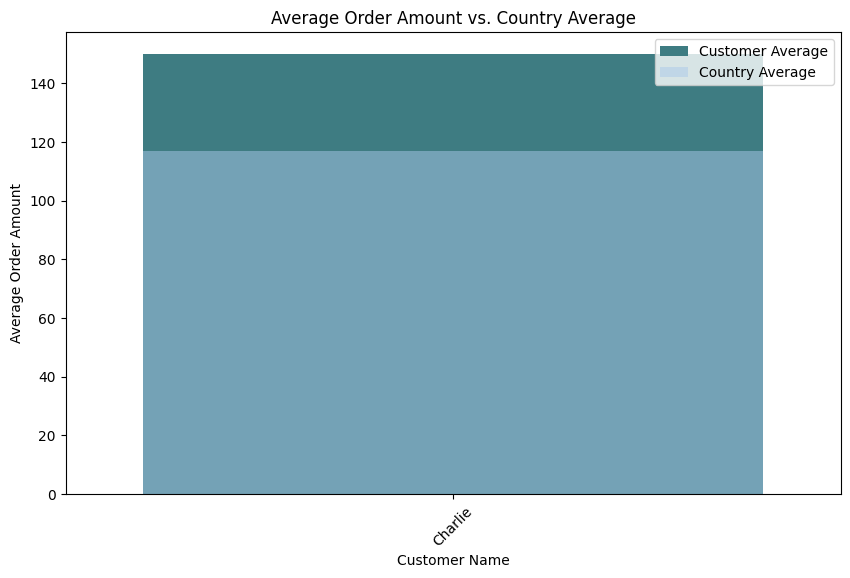

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Connect to SQLite database
conn = sqlite3.connect('customer_orders.db')
cursor = conn.cursor()

# Step 2: Creating the Database Tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS Customers (
    CustomerID INTEGER PRIMARY KEY,
    CustomerName TEXT,
    Country TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS Orders (
    OrderID INTEGER PRIMARY KEY,
    CustomerID INTEGER,
    OrderDate DATE,
    TotalAmount REAL,
    FOREIGN KEY (CustomerID) REFERENCES Customers(CustomerID)
)
''')

# Step 3: Insert Data into the Tables
cursor.executemany('''
INSERT INTO Customers (CustomerID, CustomerName, Country) VALUES (?, ?, ?)
''', [
    (1, 'Alice', 'USA'),
    (2, 'Bob', 'UK'),
    (3, 'Charlie', 'USA'),
    (4, 'Diana', 'Canada'),
    (5, 'Eve', 'Australia'),
    (6, 'Jasper', 'Spain')  # Added new customer
])

cursor.executemany('''
INSERT INTO Orders (OrderID, CustomerID, OrderDate, TotalAmount) VALUES (?, ?, ?, ?)
''', [
    (101, 1, '2024-01-15', 120.50),
    (102, 1, '2024-02-10', 80.00),
    (103, 2, '2024-01-20', 200.00),
    (104, 3, '2024-03-12', 150.00),
    (105, 4, '2024-02-05', 60.00),
    (106, 5, '2024-03-30', 90.00)
])

conn.commit()

# Function to execute a query and fetch results
def execute_query(query):
    cursor.execute(query)
    return cursor.fetchall()

# Problem 1: Customer Orders with Conditional Logic
query1 = '''
SELECT
    c.CustomerName,
    c.Country,
    ROUND(o.TotalAmount, 0) AS TotalAmount,
    CASE
        WHEN ROUND(o.TotalAmount, 0) > 150 THEN 'High'
        WHEN ROUND(o.TotalAmount, 0) BETWEEN 100 AND 150 THEN 'Medium'
        ELSE 'Low'
    END AS OrderCategory
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
'''
results1 = execute_query(query1)
df1 = pd.DataFrame(results1, columns=['CustomerName', 'Country', 'TotalAmount', 'OrderCategory'])

# Problem 2: Grouping and Aggregation by Country
query2 = '''
SELECT
    c.Country,
    COUNT(o.OrderID) AS TotalOrders
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
GROUP BY c.Country
HAVING COUNT(o.OrderID) > 1
'''
results2 = execute_query(query2)
df2 = pd.DataFrame(results2, columns=['Country', 'TotalOrders'])

# Problem 3: Combining Tables with Joins
query3 = '''
SELECT
    c.CustomerName,
    o.OrderID,
    ROUND(o.TotalAmount, 0) AS TotalAmount
FROM Customers c
LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
'''
results3 = execute_query(query3)
df3 = pd.DataFrame(results3, columns=['CustomerName', 'OrderID', 'TotalAmount'])

# Problem 4: Subqueries
query4 = '''
SELECT
    c.CustomerName,
    CEIL(o.TotalAmount) AS RoundedTotalAmount
FROM Customers c
INNER JOIN Orders o ON c.CustomerID = o.CustomerID
WHERE CEIL(o.TotalAmount) > (
    SELECT AVG(TotalAmount) FROM Orders
)
'''
results4 = execute_query(query4)
df4 = pd.DataFrame(results4, columns=['CustomerName', 'RoundedTotalAmount'])

# Problem 5: Using CTE for Average Order Amount
query5 = '''
WITH CustomerAverage AS (
    SELECT
        c.CustomerID,
        c.CustomerName,
        CEILING(AVG(o.TotalAmount)) AS AverageOrderAmount
    FROM Customers c
    LEFT JOIN Orders o ON c.CustomerID = o.CustomerID
    GROUP BY c.CustomerID, c.CustomerName
),
CountryAverage AS (
    SELECT
        c.Country,
        CEILING(AVG(o.TotalAmount)) AS CountryAvgOrderAmount
    FROM Customers c
    JOIN Orders o ON c.CustomerID = o.CustomerID
    GROUP BY c.Country
)
SELECT
    ca.CustomerID,
    ca.CustomerName,
    ca.AverageOrderAmount,
    ca2.CountryAvgOrderAmount
FROM CustomerAverage ca
JOIN Customers c ON ca.CustomerID = c.CustomerID
JOIN CountryAverage ca2 ON c.Country = ca2.Country
WHERE ca.AverageOrderAmount > ca2.CountryAvgOrderAmount
'''
results5 = execute_query(query5)
df5 = pd.DataFrame(results5, columns=['CustomerID', 'CustomerName', 'AverageOrderAmount', 'CountryAvgOrderAmount'])

# Visualizations
# Problem 1: Order Category Distribution
order_category_counts = df1['OrderCategory'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(order_category_counts, labels=order_category_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(order_category_counts)))
plt.title('Order Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Problem 2: Total Orders by Country
total_orders_by_country = df2.set_index('Country')['TotalOrders']
plt.figure(figsize=(8, 8))
plt.pie(total_orders_by_country, labels=total_orders_by_country.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(total_orders_by_country)))
plt.title('Total Orders by Country')
plt.axis('equal')
plt.show()

# Problem 4: Rounded Total Amount for Customers Exceeding Average
rounded_total_counts = df4['RoundedTotalAmount'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rounded_total_counts, labels=rounded_total_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('magma', len(rounded_total_counts)))
plt.title('Rounded Total Amount for Customers Exceeding Average')
plt.axis('equal')
plt.show()

# Problem 5: Average Order Amount vs. Country Average
plt.figure(figsize=(10, 6))
sns.barplot(data=df5, x='CustomerName', y='AverageOrderAmount', palette='crest', label='Customer Average')
sns.barplot(data=df5, x='CustomerName', y='CountryAvgOrderAmount', palette='pastel', alpha=0.5, label='Country Average')
plt.title('Average Order Amount vs. Country Average')
plt.xlabel('Customer Name')
plt.ylabel('Average Order Amount')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Close the connection
conn.close()
